Aluno: Luíza Angelo Lovo

Exercício 2 - Faça 3 modelos de regressão linear múltipla para predizer da melhor forma possível o preço dos automóveis.

1º Modelo com todas variáveis

2º Modelo com as 3 variáveis mais correlacionadas

3º Modelo com as 5 variáveis mais correlacionadas



Na análise de dados e do modelo devem contemplar:

1 – Análise descritiva

2 – Calculo de correlação e covariância

3 – Faça o modelo de regressão

4 – Realize a análise de resíduos

5 – Análise de multicolinearidade

6 – Análise de outlier

7 – Comparação de modelos

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB
None
   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5     

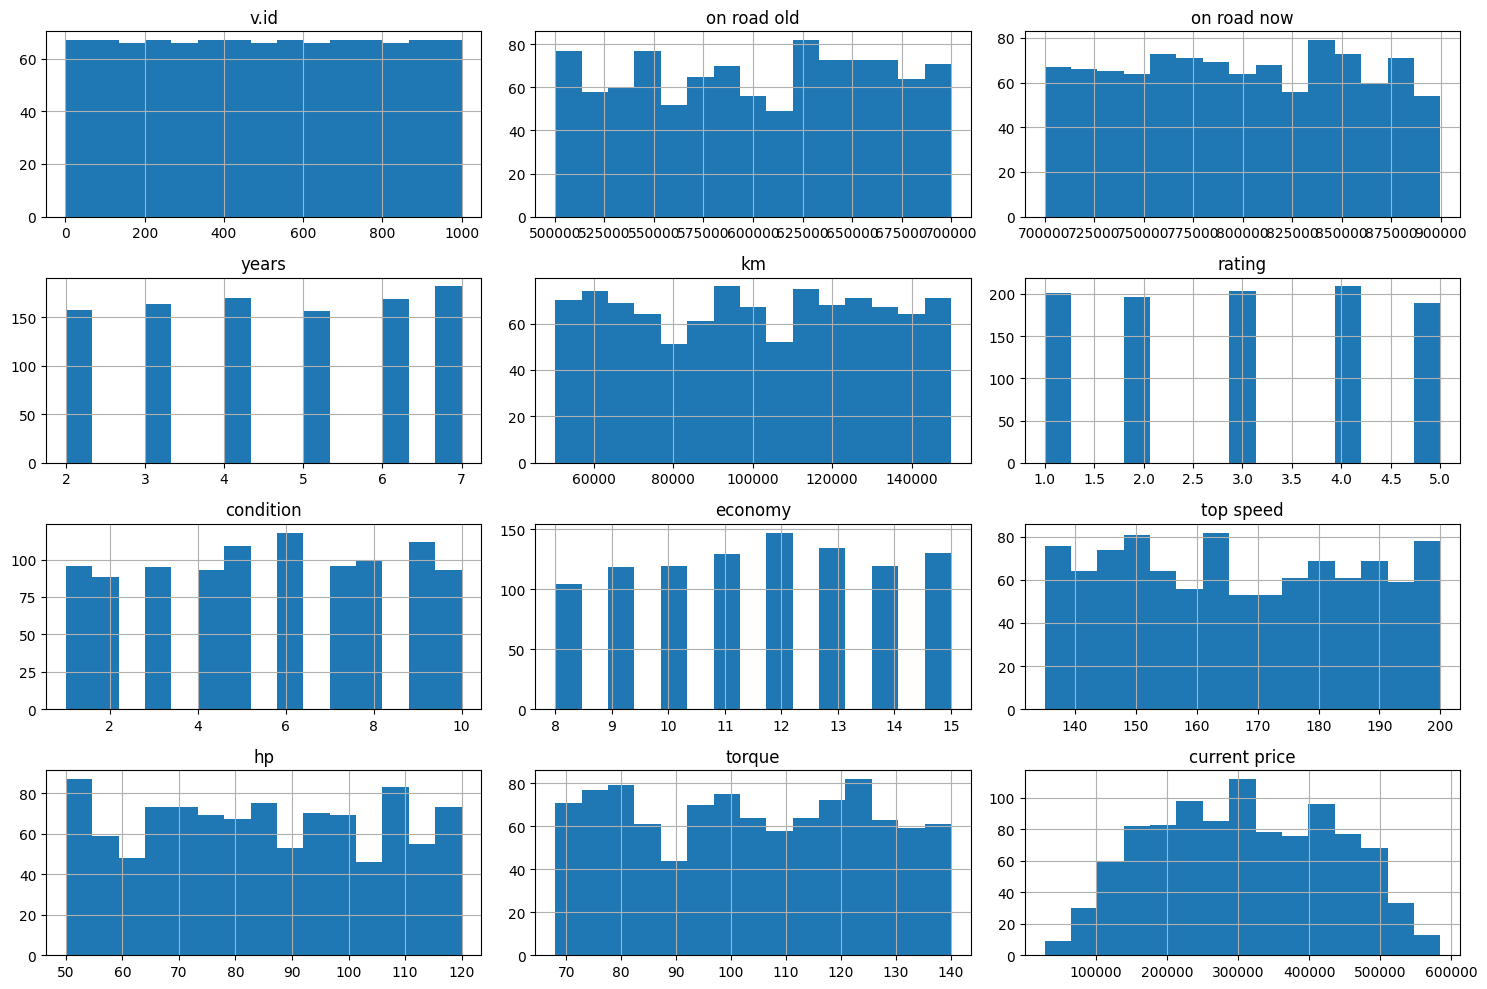

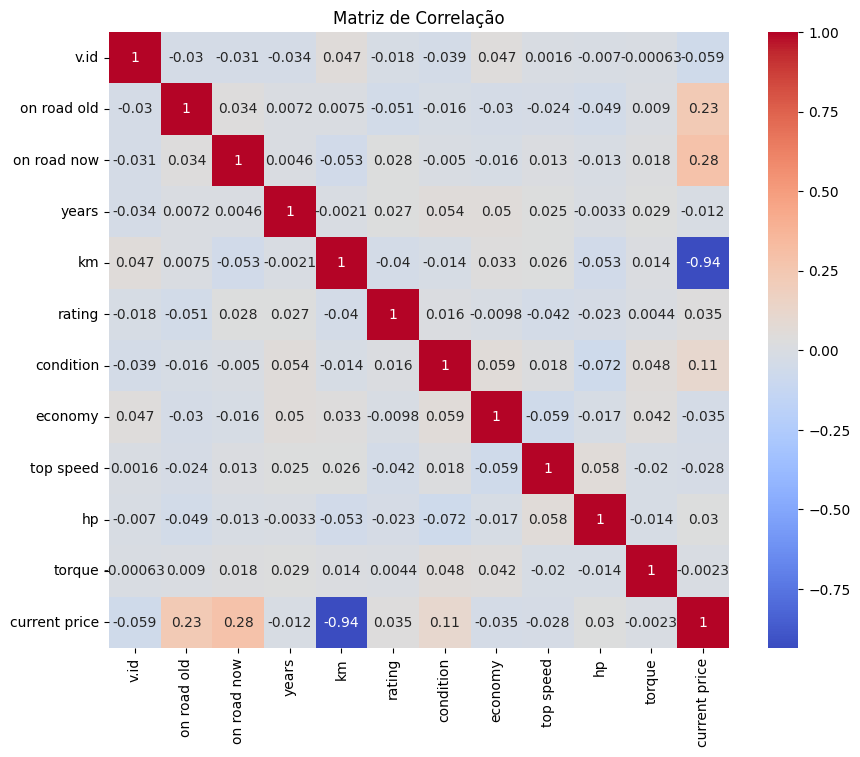

Top 3 variáveis mais correlacionadas: ['km', 'on road now', 'on road old']
Top 5 variáveis mais correlacionadas: ['km', 'on road now', 'on road old', 'condition', 'v.id']

Modelo 1: Todas as variáveis
MSE: 81030910.70443736
R2 Score: 0.9951798797617532

Modelo 2: Top 3 variáveis
MSE: 260528807.9915386
R2 Score: 0.9845024550615401

Modelo 3: Top 5 variáveis
MSE: 85406501.05134721
R2 Score: 0.9949195979581542


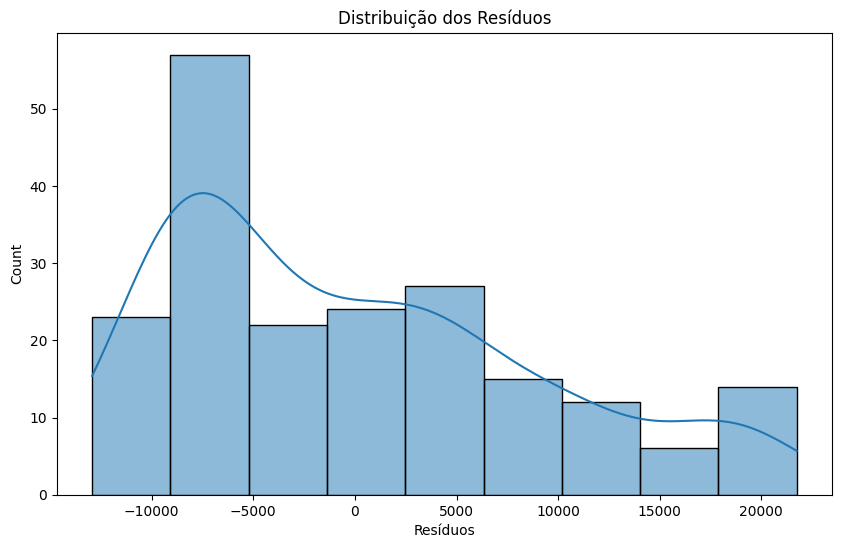


Análise de Multicolinearidade:
        feature         VIF
0  on road old   83.201308
1  on road now  120.706875
2        years    8.056407
3           km   12.540514
4       rating    5.493181
5    condition    4.963925
6      economy   26.539267
7    top speed   64.530536
8           hp   17.378673
9       torque   24.281683
Outliers detectados por variável:
 on road old    0
on road now    0
years          0
km             0
rating         0
condition      0
economy        0
top speed      0
hp             0
torque         0
dtype: int64

Comparar Modelos
Modelo 1 (Todas variáveis): 0.9951798797617532
Modelo 2 (Top 3 variáveis): 0.9845024550615401
Modelo 3 (Top 5 variáveis): 0.9949195979581542


In [5]:
data = pd.read_csv('/content/drive/My Drive/Lista 2/preco_carro.csv')

# Exibir informações iniciais do dataset
print(data.info())
print(data.head())

# 1. Análise descritiva
def descriptive_analysis(df):
    print("Resumo estatístico:\n", df.describe())
    print("\nDistribuição das variáveis:")
    df.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

# Realizar a análise descritiva
descriptive_analysis(data)

# 2. Calcular correlação e covariância
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Selecionar as 3 e 5 variáveis mais correlacionadas com 'current price'
target = 'current price'
correlation_target = correlation_matrix[target].drop(target)
top_3_features = correlation_target.abs().nlargest(3).index.tolist()
top_5_features = correlation_target.abs().nlargest(5).index.tolist()

print("Top 3 variáveis mais correlacionadas:", top_3_features)
print("Top 5 variáveis mais correlacionadas:", top_5_features)

# 3. Modelos de Regressão Linear
X_full = data.drop(columns=[target, 'v.id'])
X_top_3 = data[top_3_features]
X_top_5 = data[top_5_features]
y = data[target]

# Dividir os dados em treino e teste
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_3, X_test_3 = train_test_split(X_top_3, test_size=0.2, random_state=42)
X_train_5, X_test_5 = train_test_split(X_top_5, test_size=0.2, random_state=42)

# Função para treinar e avaliar o modelo
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    return model, y_pred

# Modelo 1: Todas as variáveis
print("\nModelo 1: Todas as variáveis")
model_full, y_pred_full = train_and_evaluate(X_train_full, X_test_full, y_train, y_test)

# Modelo 2: Top 3 variáveis
print("\nModelo 2: Top 3 variáveis")
model_top_3, y_pred_3 = train_and_evaluate(X_train_3, X_test_3, y_train, y_test)

# Modelo 3: Top 5 variáveis
print("\nModelo 3: Top 5 variáveis")
model_top_5, y_pred_5 = train_and_evaluate(X_train_5, X_test_5, y_train, y_test)

# 4. Análise de Resíduos
def residual_analysis(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title("Distribuição dos Resíduos")
    plt.xlabel("Resíduos")
    plt.show()

# Exemplo para o primeiro modelo
residual_analysis(y_test, y_pred_full)

# 5. Análise de Multicolinearidade
vif_data = pd.DataFrame()
vif_data["feature"] = X_full.columns
vif_data["VIF"] = [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]
print("\nAnálise de Multicolinearidade:\n", vif_data)

# 6. Análise de Outliers
def outlier_analysis(df):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > 3).sum()
    print("Outliers detectados por variável:\n", outliers)

# Exemplo para X_full
outlier_analysis(X_full)

# 7. Comparar Modelos
print("\nComparar Modelos")
print("Modelo 1 (Todas variáveis):", r2_score(y_test, y_pred_full))
print("Modelo 2 (Top 3 variáveis):", r2_score(y_test, y_pred_3))
print("Modelo 3 (Top 5 variáveis):", r2_score(y_test, y_pred_5))